Data mining. Task1

Plan
1. importing the data
2. process the data: convert to the proper type, substitute missing values with average number (for loop) 
3. general discover of the data:
    3.1. by sex (pie chart)
    3.2. by age (box plot)
4. splitting all set by the diagnosis
    4.1. analyse by all variables (min, max, mean)
    4.2 visualise variables (min,max, mean) by the diagnosis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('C:/Users/Lesia/Documents/NURE/DM/New folder/Dataset(1).xlsx - sheet1.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   №иб                  132 non-null    int64  
 1   Діагноз              132 non-null    object 
 2   стать                132 non-null    int64  
 3   вік                  132 non-null    int64  
 4   ЧСС в хвилину        132 non-null    int64  
 5   АТ систт             132 non-null    int64  
 6   АТ дист              132 non-null    int64  
 7   Пульс                132 non-null    int64  
 8   еритроцити           130 non-null    object 
 9   Hb                   130 non-null    float64
 10  кольоровий показник  130 non-null    object 
 11  лейкоцити            130 non-null    object 
 12  еозінофіли           130 non-null    float64
 13  палочкоядерні        130 non-null    float64
 14  сегментоядерні       130 non-null    float64
 15  лімфоцити            130 non-null    flo

Convert datatypes into needed one
Filling missing values with average number

In [21]:
# chnaging datatypes
df['еритроцити'] = pd.to_numeric(df['еритроцити'], errors='coerce')
df['кольоровий показник'] = pd.to_numeric(df['кольоровий показник'], errors='coerce')
df['лейкоцити'] = pd.to_numeric(df['лейкоцити'], errors='coerce')
df['білірубін 1'] = pd.to_numeric(df['білірубін 1'], errors='coerce')
df['білірубін2'] = pd.to_numeric(df['білірубін2'], errors='coerce')
df['білірубін3'] = pd.to_numeric(df['білірубін3'], errors='coerce')
df['АСТ'] = pd.to_numeric(df['АСТ'], errors='coerce')
df['АЛТ'] = pd.to_numeric(df['АЛТ'], errors='coerce')
df['глюкоза'] = pd.to_numeric(df['глюкоза'], errors='coerce')
df['серомукоіди'] = pd.to_numeric(df['серомукоіди'], errors='coerce')
df['білок'] = pd.to_numeric(df['білок'], errors='coerce')

In [22]:
# filling missing values with average value by the variable
for variable in df:
    if df[variable].dtype in [int, float]:
        mean_value = df[variable].mean()
        df[variable].fillna(mean_value, inplace=True)

#  check if there are any missing values
df.isna().sum()



№иб                      0
Діагноз                  0
стать                    0
вік                      0
ЧСС в хвилину            0
АТ систт                 0
АТ дист                  0
Пульс                    0
еритроцити               0
Hb                       0
кольоровий показник      0
лейкоцити                0
еозінофіли               0
палочкоядерні            0
сегментоядерні           0
лімфоцити                0
Моноцити                 0
ШОЕ                      0
білірубін 1              0
білірубін2               0
білірубін3               0
АСТ                      0
АЛТ                      0
глюкоза                  0
сіалові кислоти          0
серомукоіди            132
питома вага              0
білок                    0
лейк п/зр                0
еритр неизм п/зр         0
dtype: int64

Dealing with missinf values for суромукоіди
This variable contain a lot of missing values and it does not fill it with a mean

In [23]:
# dealing with trouble to fill missing values for seromucoids
mean_sero = df['серомукоіди'].mean()
print(df['серомукоіди'].mean())  #the mean value is absent :(
df['серомукоіди'].fillna(mean_sero, inplace=True)
df.isna().sum()

print(df['серомукоіди'].dtype)

# manual calculations of mean
mean_sero_m = 0.08
df['серомукоіди'].fillna(mean_sero_m, inplace=True)
df.isna().sum()
#no misisng values now!

nan
float64


№иб                    0
Діагноз                0
стать                  0
вік                    0
ЧСС в хвилину          0
АТ систт               0
АТ дист                0
Пульс                  0
еритроцити             0
Hb                     0
кольоровий показник    0
лейкоцити              0
еозінофіли             0
палочкоядерні          0
сегментоядерні         0
лімфоцити              0
Моноцити               0
ШОЕ                    0
білірубін 1            0
білірубін2             0
білірубін3             0
АСТ                    0
АЛТ                    0
глюкоза                0
сіалові кислоти        0
серомукоіди            0
питома вага            0
білок                  0
лейк п/зр              0
еритр неизм п/зр       0
dtype: int64

73 59


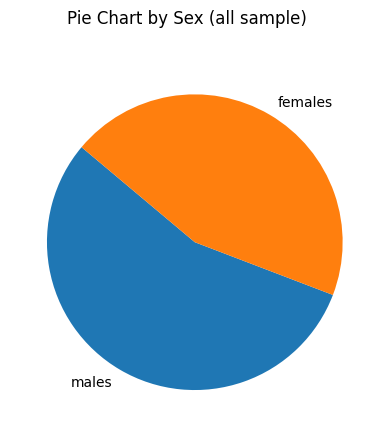

In [24]:
# full dataset analysis
males = len(df[df['стать'] == 0])
females = len (df[df['стать'] == 1])
print (males, females)
labels = ['males', 'females']
plt.pie([males,females], labels=labels, startangle=140)
plt.suptitle('Pie Chart by Sex (all sample)')
plt.show()

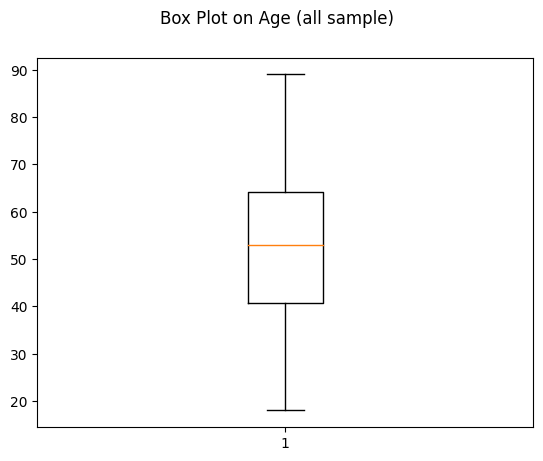

In [25]:
plt.boxplot(df['вік'])
plt.suptitle('Box Plot on Age (all sample)')
plt.show()

In [26]:
# nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# grouped = df.groupby('Діагноз')['еритроцити'].agg([min,max, sum])
# result_df=[]
# # print (grouped)
# for variable in df.columns:
#     if variable != 'Діагноз':  # Skip the 'Діагноз' column itself
#         grouped = df.groupby('Діагноз')[variable].agg(['min', 'max', 'mean']).reset_index()
#         grouped.rename(columns={'min': f'{variable}_min', 'max': f'{variable}_max', 'mean': f'{variable}_mean'}, inplace=True)
#         result_df = pd.merge(result_df, grouped, on='Діагноз', how='outer')
# print (df.columns)

grouped = df.groupby('Діагноз')[['вік', 'ЧСС в хвилину', 'АТ систт',
       'АТ дист', 'Пульс', 'еритроцити', 'Hb', 'кольоровий показник',
       'лейкоцити', 'еозінофіли', 'палочкоядерні', 'сегментоядерні',
       'лімфоцити', 'Моноцити', 'ШОЕ', 'білірубін 1', 'білірубін2',
       'білірубін3', 'АСТ', 'АЛТ', 'глюкоза', 'сіалові кислоти', 'серомукоіди',
       'питома вага', 'білок', 'лейк п/зр', 'еритр неизм п/зр']].agg([min, max, 'mean'])
print (grouped.head(20))

          вік                ЧСС в хвилину                АТ систт       \
          min max       mean           min max       mean      min  max   
Діагноз                                                                   
БА         18  86  50.245283            15  33  23.037736      120  180   
Пневмонія  20  89  48.575758            19  30  22.484848       60  160   
ХОЗЛ       36  81  58.652174            18  29  24.195652      110  170   

                      АТ дист  ...  питома вага білок           лейк п/зр  \
                 mean     min  ...         mean   min  max mean       min   
Діагноз                        ...                                          
БА         132.169811      70  ...  1015.942286   0.0  0.0  0.0       0.0   
Пневмонія  127.424242      40  ...  1016.029709   0.0  0.0  0.0       0.0   
ХОЗЛ       137.717391      70  ...  1016.607843   0.0  0.0  0.0       1.0   

                          еритр неизм п/зр                 
            max      mean 

In [27]:
asthma = pd.DataFrame(df[df['Діагноз'] == "БА"])
pneumonia = pd.DataFrame(df[df['Діагноз'] == "Пневмонія"])
copd = pd.DataFrame(df[df['Діагноз'] == "ХОЗЛ"])

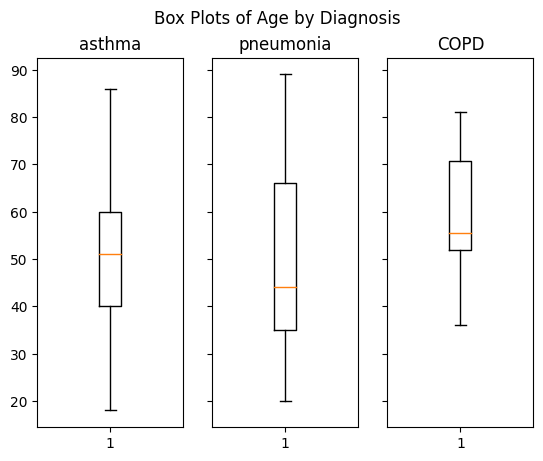

In [28]:
fig, axs = plt.subplots(1,3, sharey=True) 

axs[0].boxplot(asthma['вік']) 
axs[1].boxplot(pneumonia['вік']) 
axs[2].boxplot(copd['вік']) 

axs[0].set_title('asthma')
axs[1].set_title('pneumonia')
axs[2].set_title('COPD')

plt.suptitle('Box Plots of Age by Diagnosis')
plt.show()

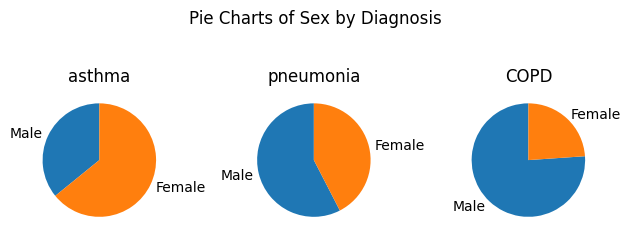

In [29]:
fig, axs = plt.subplots(1,3, sharey=True) 
sex_labels = ['Male', 'Female']

axs[0].pie([len(asthma[asthma['стать'] == 0]), len(asthma[asthma['стать'] == 1])], labels=sex_labels, startangle=90)
axs[1].pie([len(pneumonia[pneumonia['стать'] == 0]), len(pneumonia[pneumonia['стать'] == 1])], labels=sex_labels, startangle=90)
axs[2].pie([len(copd[copd['стать'] == 0]), len(copd[copd['стать'] == 1])], labels= sex_labels, startangle=90)


axs[0].set_title('asthma')
axs[1].set_title('pneumonia')
axs[2].set_title('COPD')

plt.suptitle('Pie Charts of Sex by Diagnosis')
plt.tight_layout()
plt.subplots_adjust(top=1.3)
plt.show()

Now, we need to analyse all the variables by diagnosis (splitted in three categories) and represent min, mean and max variables
should we do the barcharts? 
somehow? (but then we need to sum up the variables)


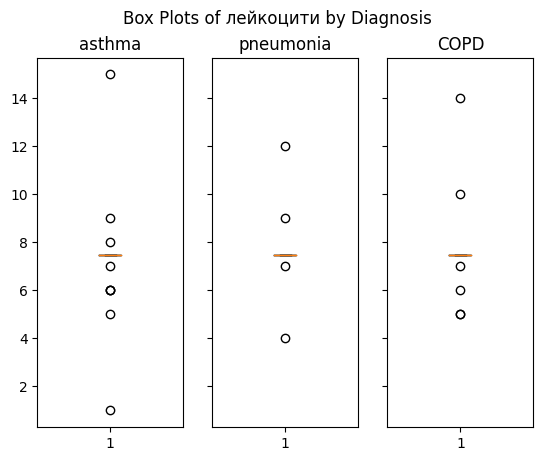

In [30]:
def box_plot (data, variable, scale='linear'): 

    fig, axs = plt.subplots(1,3, sharey=True) 
    axs[0].boxplot(asthma[variable])  #add sym='' for outliers (extreme values) to be removed
    axs[1].boxplot(pneumonia[variable]) 
    axs[2].boxplot(copd[variable])

    axs[0].set_title('asthma')
    axs[1].set_title('pneumonia')
    axs[2].set_title('COPD')

    plt.suptitle(f'Box Plots of {variable} by Diagnosis')
    plt.show()

# check if function works fine
box_plot(df, 'лейкоцити')




Boxplot all the variables to represent

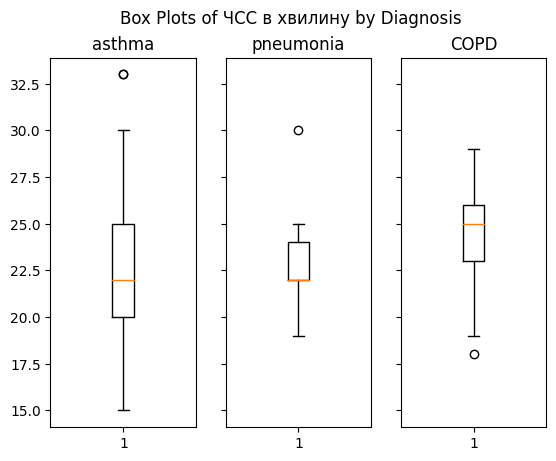

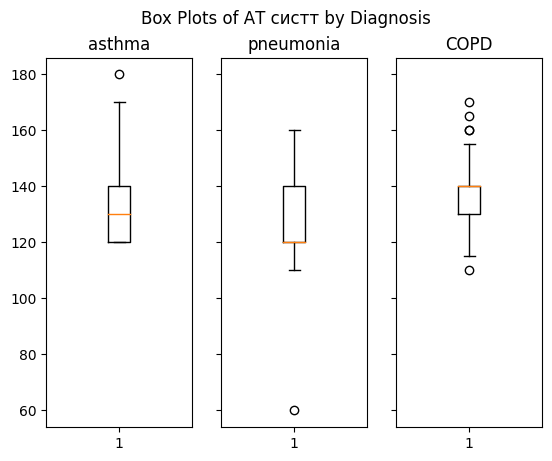

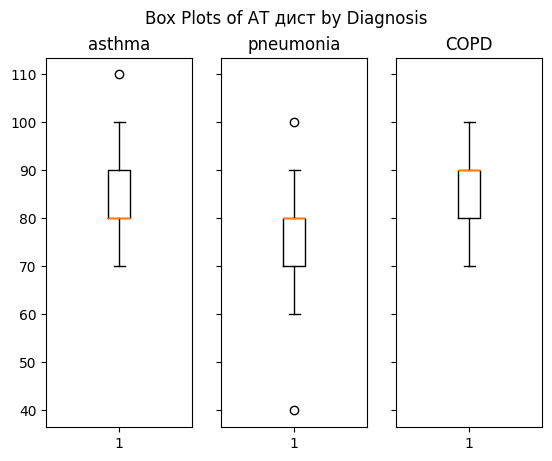

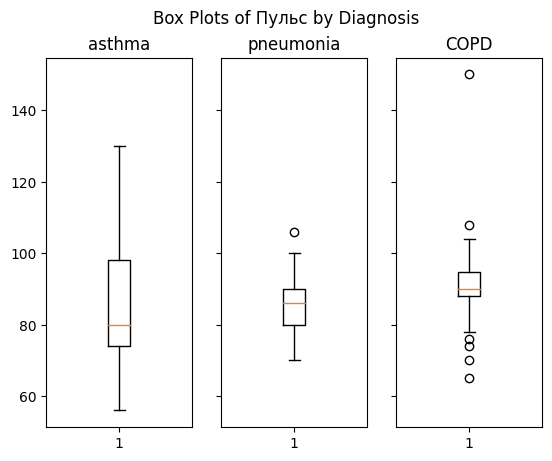

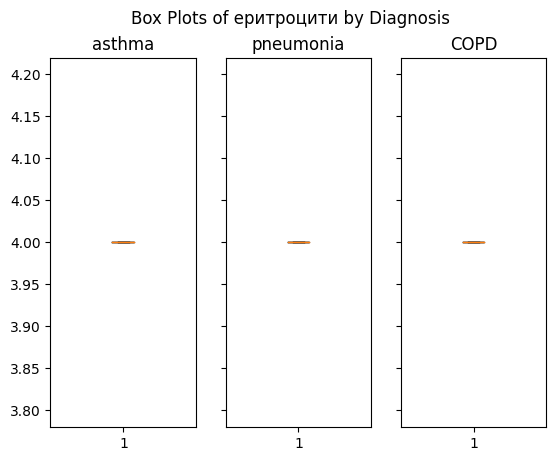

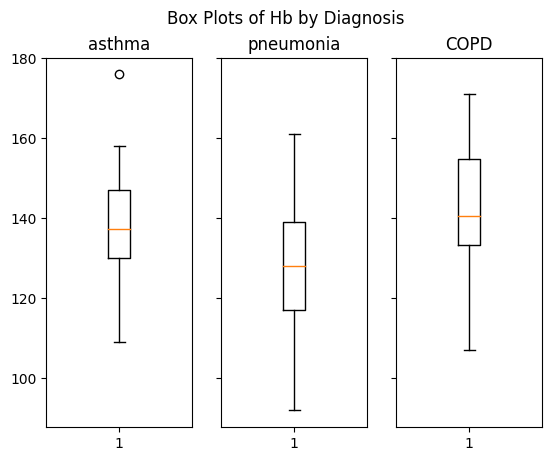

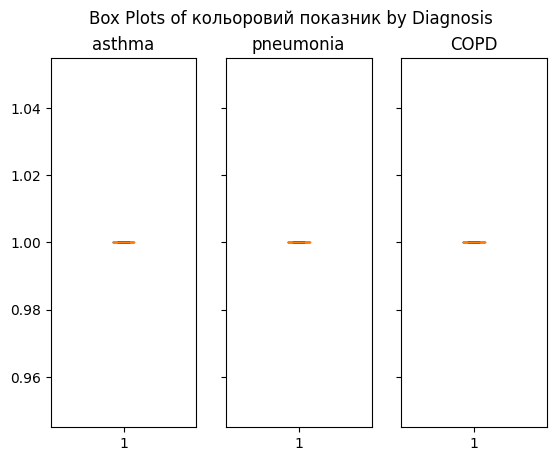

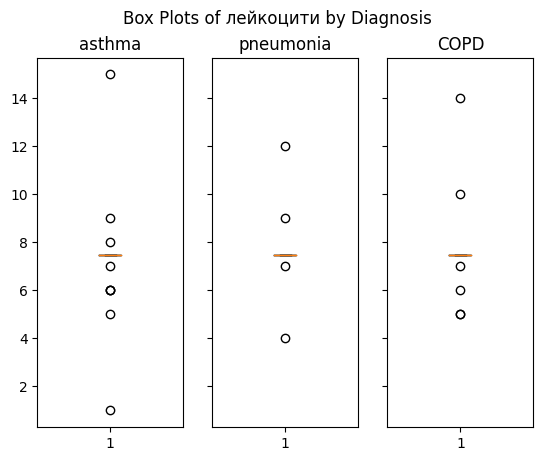

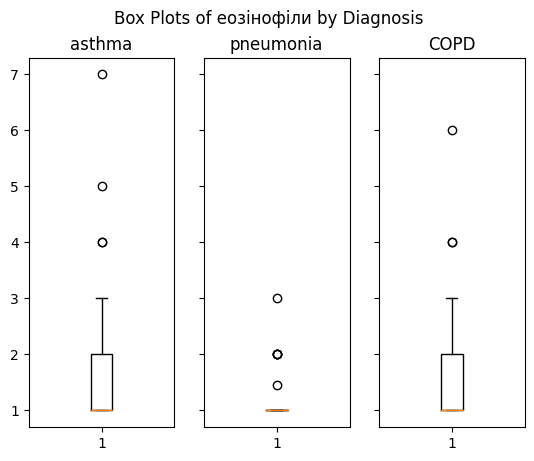

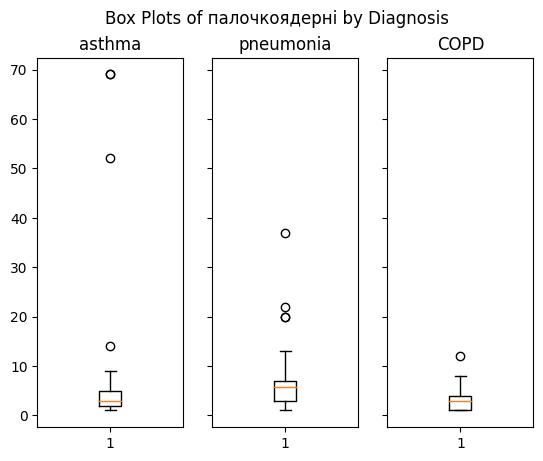

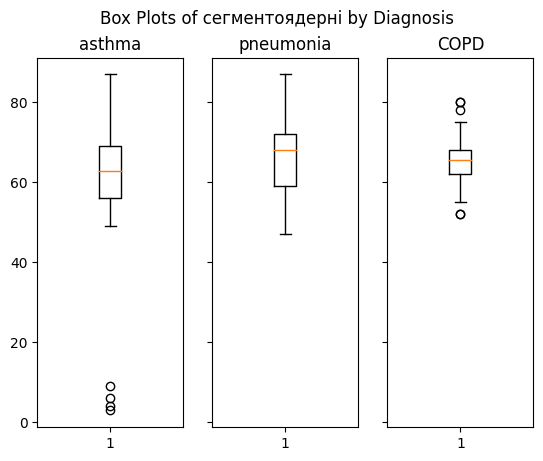

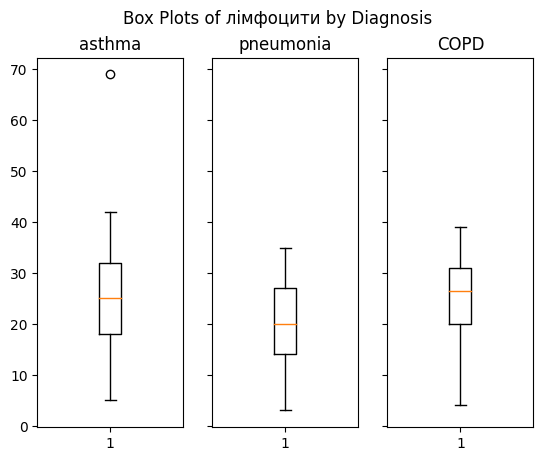

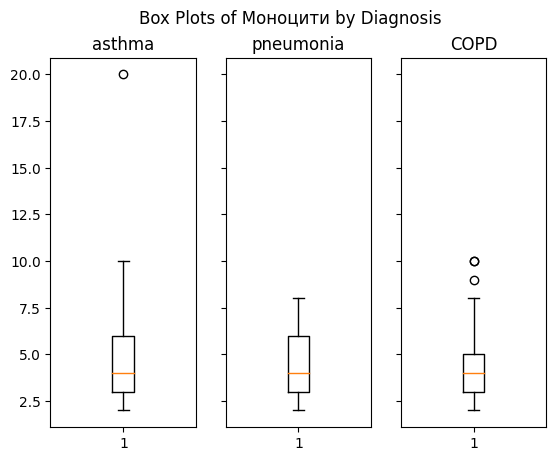

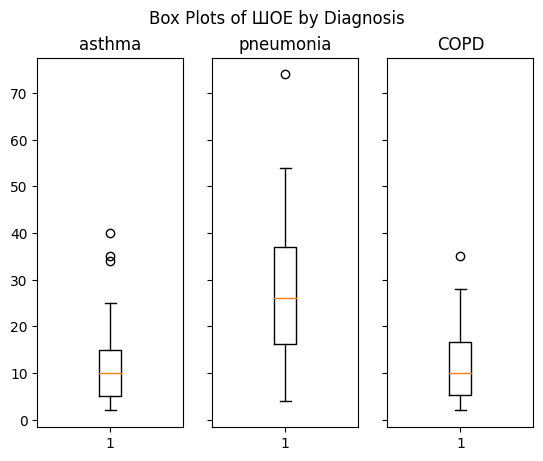

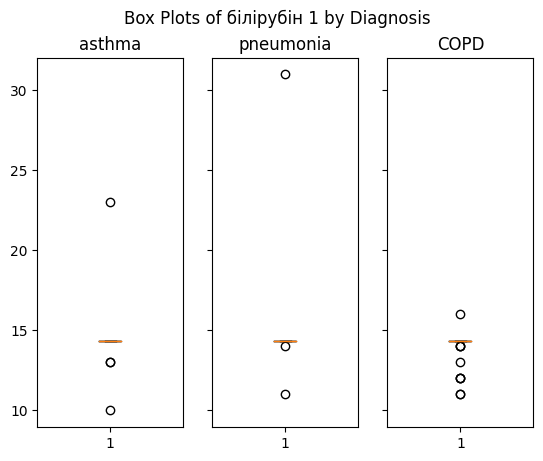

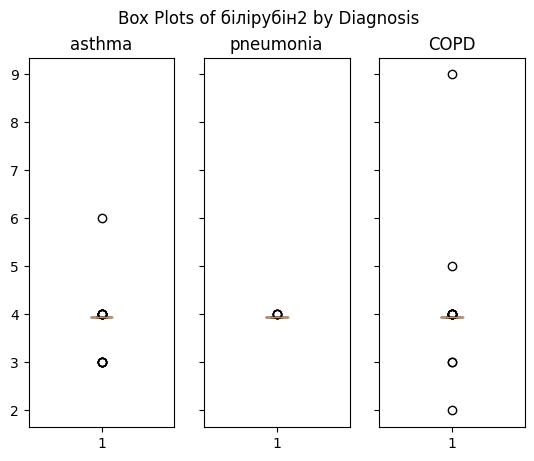

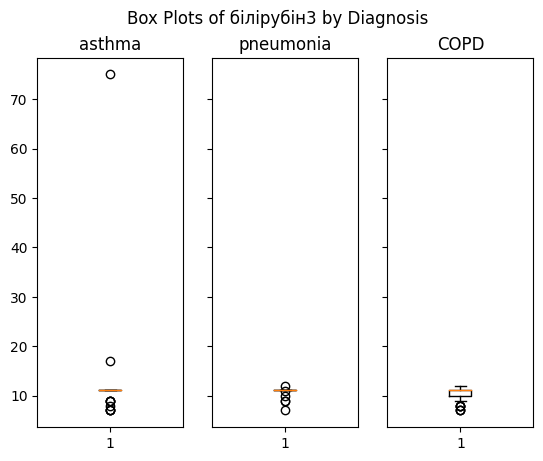

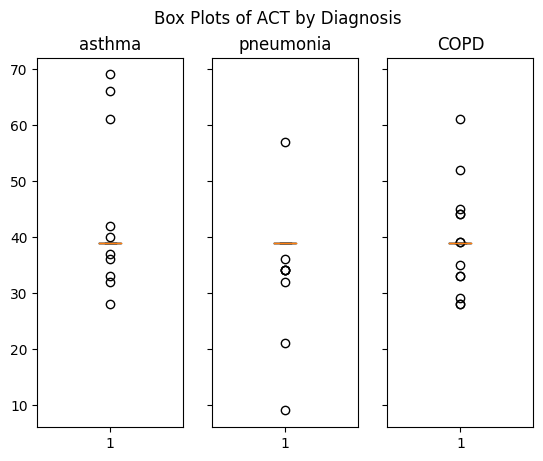

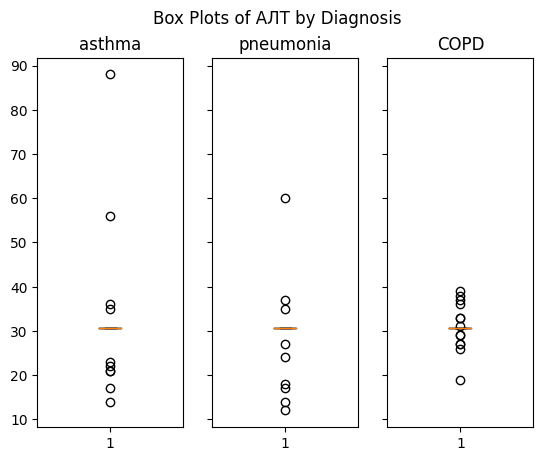

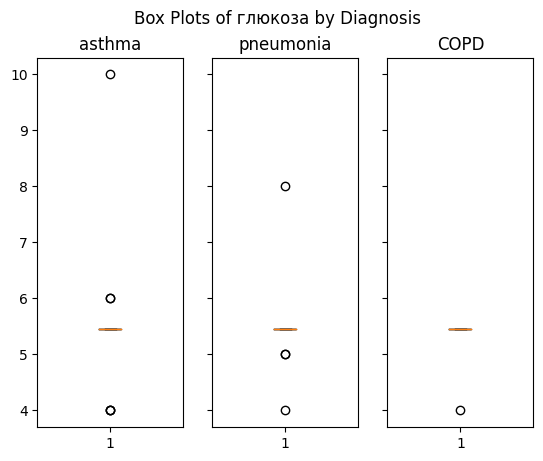

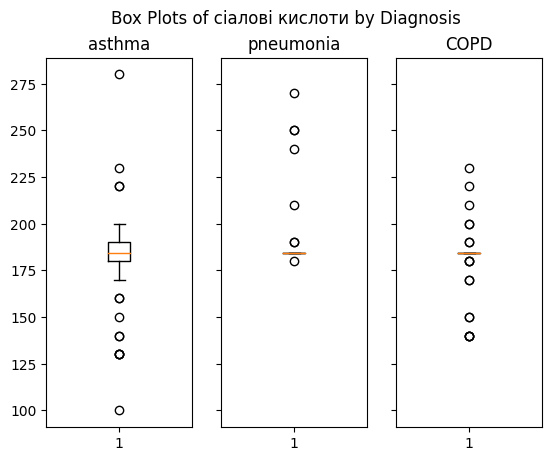

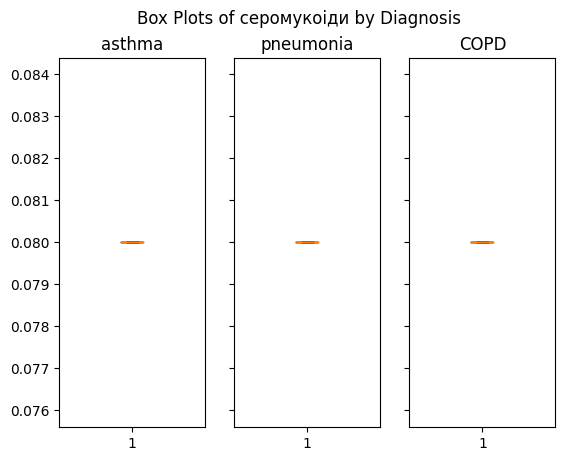

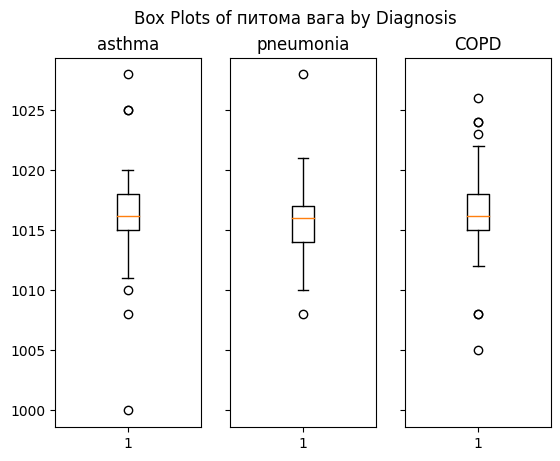

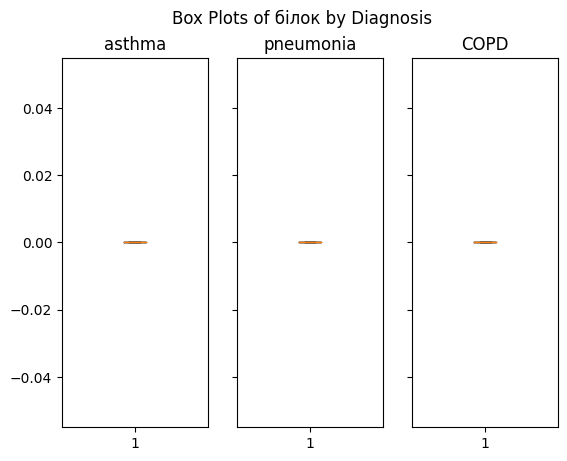

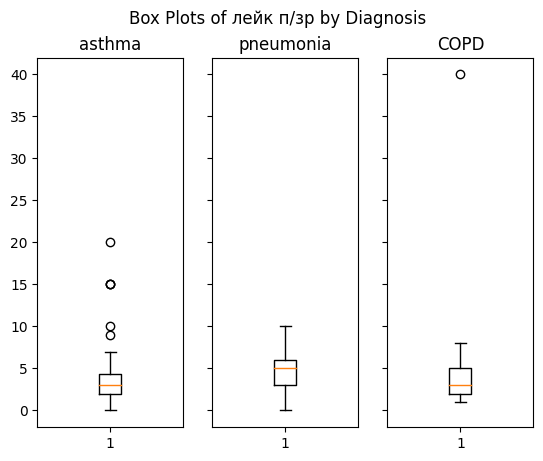

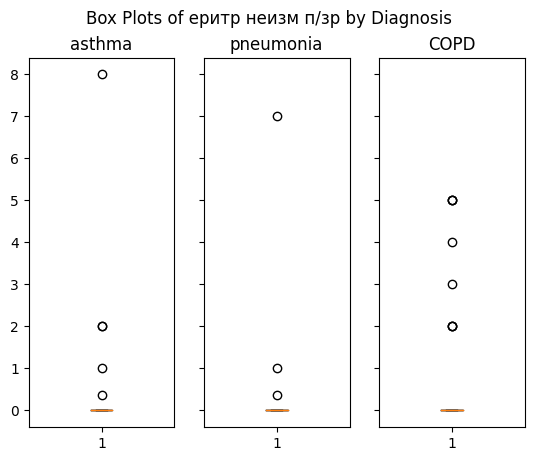

In [31]:
# print (df.columns.unique)   #printing out all columns in order to select needed variables for the representation
variables_to_represent = ['ЧСС в хвилину', 'АТ систт',
       'АТ дист', 'Пульс', 'еритроцити', 'Hb', 'кольоровий показник',
       'лейкоцити', 'еозінофіли', 'палочкоядерні', 'сегментоядерні',
       'лімфоцити', 'Моноцити', 'ШОЕ', 'білірубін 1', 'білірубін2',
       'білірубін3', 'АСТ', 'АЛТ', 'глюкоза', 'сіалові кислоти', 'серомукоіди',
       'питома вага', 'білок', 'лейк п/зр', 'еритр неизм п/зр']

for variable in variables_to_represent: 
    box_plot(df, variable)

At this stage we can see that boxplot is not the best idea. 
What problems there could be: 
1. еротроцити - the scale vary between 3.80 and 4.20, while almost all data there are about point 4. possible solution: we might change the scale manually
2. кольоровий показник - similar situation to the previous one. scale is between 0.96 and 1.04, while all point around 1
3. білок - kind of the same situation, we have couple odds in the dataset, but almost all variables around 0
4. серомукоїди - there is no reprsentation of data at all. needed to check whether the missing values in that variable was conducted correct. scale in that case must be between 0 and 0.5 (min value found in the data is 0.1, max - 0.5)
update: we calculated manually the mean value and filled it. hence now there is some representation on the graph
5. three variables of білірубін: 
    білірубін1 - clean extreme value and scale it up between 10 and 15
    білірубін2 - clean extreme values (9 and 6 in two datasets)
    білірубін3 - clean extreme value (above 70)